In [37]:
import numpy as np
import pandas as pd
df = pd.read_excel('respuestas_cuestionario.xlsx')

# 1. Codificación correcta: género binario (ignorando "Otro" que no aparece), residencia como one-hot, frecuencia como ordinal
df['genero'] = df['genero'].map({'Hombre': 0, 'Mujer': 1})

# Verificación de valores únicos antes de codificar la frecuencia
actividad_map = {
    'Solo en fiestas o vacaciones': 0,
    'De vez en cuando': 1,
    'Varias veces por semana': 2,
    'A diario': 3
}
df['actividad_frecuencia'] = df['actividad_frecuencia'].map(actividad_map)

# One-hot encoding para residencia (no ordinal)
residencia_dummies = pd.get_dummies(df['residencia'], prefix='residencia')

def expandir_recomendaciones(columna):
    actividades = [
        "Naturaleza y paseos", "Rutas", "Monumentos o historia",
        "Sitios tranquilos para descansar", "Eventos o fiestas",
        "Bares y restaurantes"
    ]
    resultado = pd.DataFrame(0, index=df.index, columns=[f"{columna}_{a}" for a in actividades])
    for i, respuesta in enumerate(df[columna].fillna('')):
        for actividad in actividades:
            if actividad in respuesta:
                resultado.at[i, f"{columna}_{actividad}"] = 1
    return resultado
recom_cols = ['recom_familias', 'recom_jovenes', 'recom_mayores']
recomendaciones_expandidas = pd.concat([expandir_recomendaciones(c) for c in recom_cols], axis=1)
X = pd.concat([
    df[['edad', 'genero', 'actividad_frecuencia', 'freq_recom']],
    residencia_dummies,
    recomendaciones_expandidas
], axis=1)

valoraciones_cols = [col for col in df.columns if col.startswith("valoracion_")]
Y = df[valoraciones_cols].applymap(lambda x: 1 if x >= 4 else 0)

C:\Users\jorge\AppData\Local\Temp\ipykernel_7588\505607549.py:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Y = df[valoraciones_cols].applymap(lambda x: 1 if x >= 4 else 0)


In [38]:
X

,edad,genero,actividad_frecuencia,freq_recom,residencia_No,"residencia_No, pero soy de aquí",residencia_Solo en verano o en vacaciones,"residencia_Sí, todo el año",recom_familias_Naturaleza y paseos,recom_familias_Rutas,...,recom_jovenes_Monumentos o historia,recom_jovenes_Sitios tranquilos para descansar,recom_jovenes_Eventos o fiestas,recom_jovenes_Bares y restaurantes,recom_mayores_Naturaleza y paseos,recom_mayores_Rutas,recom_mayores_Monumentos o historia,recom_mayores_Sitios tranquilos para descansar,recom_mayores_Eventos o fiestas,recom_mayores_Bares y restaurantes
0,21,0,1,3,False,False,True,False,1,1,...,0,0,1,1,0,0,1,1,0,0
1,20,1,0,2,False,False,False,True,1,0,...,0,0,1,1,0,0,1,1,0,0
2,29,1,0,1,False,False,False,True,1,0,...,0,0,0,1,1,0,0,1,0,0
3,24,0,0,5,False,True,False,False,1,1,...,1,1,1,1,1,1,1,1,1,1
4,43,1,0,5,False,False,True,False,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,16,1,1,4,False,False,True,False,1,1,...,0,0,1,1,1,1,1,1,0,1
108,52,1,1,5,False,True,False,False,1,1,...,0,0,1,0,1,0,1,1,0,0
109,60,1,0,3,False,True,False,False,1,0,...,0,1,1,0,0,1,0,1,1,0
110,50,0,1,5,False,False,True,False,1,1,...,0,1,0,1,1,0,0,1,0,0


In [41]:
Y

,valoracion_IglesiaSantoDomingoSilos,valoracion_PanteonMarquesesMoya,valoracion_CastilloAliaga,valoracion_LagunaCaolin,valoracion_RiberaRioGuadazaon,valoracion_CerritoArena,valoracion_MiradorCruz,valoracion_FuenteTresCanos,valoracion_PuenteCristinasRioCabriel,valoracion_TorcasPalancaresTierraMuerta,valoracion_LagunasCanadaHoyo,valoracion_ChorrerasRioCabriel,valoracion_FachadaHarinas,valoracion_Ruta1,valoracion_Ruta2,valoracion_SaltoBalsa,valoracion_MiradorPicarcho
0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,1,0
1,0,1,0,1,1,1,1,0,1,0,1,1,0,0,0,1,1
2,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,1
3,0,1,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0
4,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
108,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


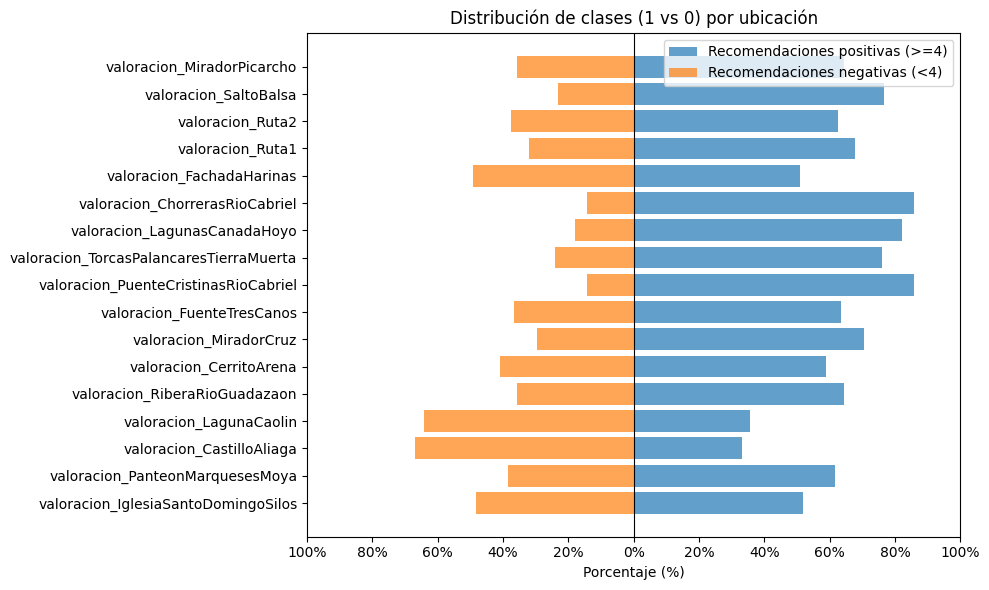

In [43]:
import matplotlib.pyplot as plt

# Contar la distribución de clases (0 y 1) para cada ubicación
clase_distribucion = Y.apply(lambda col: col.value_counts())

# Calcular el porcentaje de cada clase
clase_porcentaje = Y.apply(lambda col: col.value_counts(normalize=True) * 100)

# Unir ambos resultados en una tabla
resumen_clases = pd.concat([clase_distribucion, clase_porcentaje], keys=["Conteo", "Porcentaje"])


# Crear un DataFrame con las proporciones
proporciones = clase_porcentaje.T  # Transpuesta para tener lugares como filas
proporciones = proporciones.fillna(0)

# Crear gráfico tipo "barh" con barras dobles (positivo vs negativo)
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar barras para la clase 1 y clase 0 con diferentes tonos y desplazadas
ax.barh(proporciones.index, proporciones[1], label='Recomendaciones positivas (>=4)', alpha=0.7)
ax.barh(proporciones.index, -proporciones[0], label='Recomendaciones negativas (<4)', alpha=0.7)

# Añadir etiquetas
ax.set_xlabel('Porcentaje (%)')
ax.set_title('Distribución de clases (1 vs 0) por ubicación')
ax.legend()
ax.axvline(0, color='black', linewidth=0.8)

# Ajustar ejes
ax.set_xlim(-100, 100)
ax.set_xticks(range(-100, 101, 20))
ax.set_xticklabels([f"{abs(x)}%" for x in range(-100, 101, 20)])

plt.tight_layout()
plt.savefig("figura1vs0.png", dpi=300, bbox_inches='tight')
plt.show()